# ĐỒ ÁN CUỐI KỲ LẬP TRÌNH PYTHON CHO KHOA HỌC DỮ LIỆU

## Thông tin đồ án

+ Chủ đề: **Tìm hiểu về giá thuê chung cư ở thành phố Hồ Chí Minh**
+ Github: [p4ds-final](https://github.com/vanhung4499/p4ds)

### Thông tin nhóm

Nhóm bao gồm các thanh vien:

| MSSV    | Họ và tên       |
|---------|-----------------|
| 1712222 | Nguyễn Văn Hùng |
| 20120401| Nguyễn Đức Việt |

## Môi trường làm việc

In [117]:
import sys
sys.executable

'/usr/local/Caskroom/miniconda/base/envs/min_ds-env/bin/python'

Môi trường làm việc:
+ OS: macOS
+ IDE: Pycharm
+ Sử dụng môi trường `min_ds-env` như các bài lab

## Import and constant

In [118]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [119]:
DATA_CSV = './data/hcm-apartment-rent-data.csv'
plt.style.use("fivethirtyeight")

## 1. Thu thập dữ liệu

### 1.1. Chủ đề, mục đích và nguồn của dữ liệu?

+ Chủ đề em nhắm tới là về giá thuê chung cư ở thành phố Hồ Chí Minh.
+ Do tìm trên kaggle chỉ có rất ít bộ dữ liệu về giá thuê chung cư của thành phố Hồ Chí Minh và chúng cũng đã cũ và em cảm thấy nó ít không đủ thông tin nên em đã tự crawl dữ liệu từ [nhatot.vn](https://www.nhatot.com/thue-can-ho-chung-cu-tp-ho-chi-minh), trang môi giới xếp top đầu trong lĩnh vực bất động sản ở Việt Nam trên [Google](https://www.google.com/search?q=thu%C3%AA+chung+c%C6%B0+h%E1%BB%93+ch%C3%AD+minh&oq=thu%C3%AA+chung+c%C6%B0&aqs=chrome.1.69i59l3j0i512l2j69i60l3.4604j0j7&sourceid=chrome&ie=UTF-8).
+ Mục đích của em khá đơn giản và thực tế là để xem xét giá cả chung cư cho thuê ở TPHCM, trong thời gian tới em cũng có thể sẽ tìm chỗ ở mới (module này có thể tái sử dụng).

### 1.2. Người ta có cho phép sử dụng dữ liệu như thế này hay không?

+ Việc crawl dữ liệu từ Nhatot thông qua public API của Chotot, nên có thể xem là là được phép sử dụng dữ liệu!
+ Đối với project này nhằm mục đích nâng cao kiến thức, không phục vụ mục đích thương mại

### 1.3. Thu thập dữ liệu này như thế nào?

+ Dữ liệu được crawl từ [nhatot.vn](https://www.nhatot.com/thue-can-ho-chung-cu-tp-ho-chi-minh), là trang môi giới về bất động sản lớn ở Việt Nam, web có rất nhiều tin cho thuê nhà.
+ Crawl toàn bộ 1000 trang thu về gần 20000 record.
+ Chi tiết về phương pháp crawl được mô tả ở file notebook `crawl-data.ipynb`.

## 2. Khám phá dữ liệu

### 2.1. Đọc dữ liệu

In [120]:
apartment_df = pd.read_csv(DATA_CSV)
apartment_df.head()

,ad_id,list_id,list_time,subject,body,price,price_string,size,rooms,toilets,...,region_name,ward_name,street_name,deposit,zero_deposit,longitude,latitude,owner,company_ad,apartment_type
0,148983771,109051906,1702006245000,"1 PHÒNG NGỦ TÁCH BẾP 45M2, CHO NUÔI PET!",CĂN HỘ CAO CẤP 1 PHÒNG NGỦ!__45M2\n✓BAN CÔNG L...,8600000,"8,6 triệu/tháng",45,1,1,...,Tp Hồ Chí Minh,Phường Thảo Điền (Quận 2 cũ),Nguyễn Văn Hưởng,8600000,False,107,11,False,True,"Căn hộ dịch vụ, mini"
1,152808559,112328722,1701933976000,Căn hộ chung cư saigonLAND hẻm 69 Nguyễn Gia T...,Cần cho thuê căn chung cư Saigon Land tại hẻm ...,15000000,15 triệu/tháng,110,3,2,...,Tp Hồ Chí Minh,Phường 25,D2,0,False,107,11,False,False,Chung cư
2,152043174,111673373,1702110778000,LAVITA CHARM CHO THUÊ CH 2PN 68M2 CÓ NT ĐẸP,CH LAVITA CHARM 1PN VIEW ĐẸP NGAY GẦN NGÃ TƯ B...,8500000,"8,5 triệu/tháng",68,2,2,...,Tp Hồ Chí Minh,Phường Trường Thọ (Quận Thủ Đức cũ),Số 1,0,False,107,11,False,True,Chung cư
3,150969082,110755872,1701743146000,CH cửa kính Thoáng Mát - Máy giặt riêng Ngay Đ...,CH cửa kính Thoáng Mát - Máy giặt riêng Ngay Đ...,7000000,7 triệu/tháng,35,1,1,...,Tp Hồ Chí Minh,Phường 4,Đường Trần Phú,0,False,107,11,False,True,Chung cư
4,150055631,109969444,1702115497000,Chính chủ Cho thuê căn hộ Saigon South căn 2PN...,"- Căn hộ 71m², 75m², 76m² - 2PN + 2WC.\n+ Nội ...",13000000,13 triệu/tháng,75,2,2,...,Tp Hồ Chí Minh,Xã Phước Kiển,Nguyễn Hữu Thọ,0,False,107,11,False,True,Chung cư


### 2.2. Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [121]:
apartment_df.shape

(19895, 21)

Dữ liệu gồm 19895 dòng và 21 cột, như những gì trình bày trong phần crawl trước đó

### 2.3. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

+ Mỗi dòng là thông tin cho thuê của một căn hộ như giá thuê, diện tích, số phòng, số nhà vệ sinh, địa chỉ,...
+ Dựa theo thông tin trên web lúc crawl thì sẽ không có các dòng có ý nghĩa khác nhau.

### 2.4. Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả về các cột:

| Column         | Description                                |
|----------------|--------------------------------------------|
| ad_id          | id của tin (để phân biệt)                  |
| list_id        | id trong danh sách ads (để phân biệt) |
| list_time      | Thời gian đăng tin                         |
| price          | Giá thuê (VND)                             |
| price_string   | Giá thuê dạng chuỗi (triệu / tháng)        |
| size           | Diện tích (m2)                             |
| rooms          | Số phòng                                   |
| toilets        | Số nhà vệ sinh                             |
| body           | Mô tả                                      |
| street_name    | Đường                                      |
| ward_name      | Phường                                     |
| area_name      | Quận/huyện                                 |
| region_name    | Thành phố/tỉnh                             |
| zero_deposit   | Có cần cọc không?                          |
| deposit        | Tiền đặt cọc                               |
| longitude      | Kinh độ                                    |
| latitude       | Vĩ độ                                      |
| owner          | Có phải chủ nhà đăng tin không?            |
| company_ad     | Tin của cá nhân hay công ty                |
| apartment_type | Kiểu căn hộ / chung cư                     |

### 2.4. Kiểm tra dữ liệu có bị trùng lặp không?

In [122]:
apartment_df.duplicated().sum()

0

Dữ liệu thu thập được không bị trùng lặp, dựa vào việc crawl trước đó nên có thể yên tâm

### 2.5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [123]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19895 entries, 0 to 19894
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ad_id           19895 non-null  int64  
 1   list_id         19895 non-null  int64  
 2   list_time       19895 non-null  int64  
 3   subject         19895 non-null  object 
 4   body            19895 non-null  object 
 5   price           19895 non-null  int64  
 6   price_string    19895 non-null  object 
 7   size            19895 non-null  float64
 8   rooms           19895 non-null  int64  
 9   toilets         19894 non-null  float64
 10  area_name       19895 non-null  object 
 11  region_name     19895 non-null  object 
 12  ward_name       19887 non-null  object 
 13  street_name     19885 non-null  object 
 14  deposit         19895 non-null  int64  
 15  zero_deposit    19895 non-null  bool   
 16  longitude       19894 non-null  float64
 17  latitude        19894 non-null 

Một số nhận xét như sau:
+ Cột `toilets`, `price` là số nhà vệ sinh nên có kiểu dữ liệu `int64`, hợp lý
+ Cột `list_time` là thời gian đăng tin nên có kiểu `datetime`, ở đây đang là timestamp nên cần chuyển đổi
+ Cột `ad_id`, `list_id`, `company_ad`, sẽ không còn cần thiết với mục đích tìm hiểu
+ Cột `price`, `toilets`, `area_name`, `longitude`, `latitude` có bị thiếu nên ta sẽ loại bỏ những dòng thiếu này

In [124]:
# convert timestamp in milisecond to datetime
apartment_df['list_time'] = pd.to_datetime(apartment_df['list_time'], unit='ms')
apartment_df['list_time'].head()

0   2023-12-08 03:30:45
1   2023-12-07 07:26:16
2   2023-12-09 08:32:58
3   2023-12-05 02:25:46
4   2023-12-09 09:51:37
Name: list_time, dtype: datetime64[ns]

In [125]:
# drop missing value
apartment_df = apartment_df.dropna()
# drop not used column
apartment_df = apartment_df.drop(['ad_id', 'list_id', 'company_ad'], axis=1)
apartment_df.shape

(19878, 18)

Còn lại 19878 dòng, khá đủ để thực hiện phân tích

In [126]:
# convert float64 to int64
# apartment_df['toilets'] = apartment_df['toilets'].apply(np.int64)
# apartment_df['price'] = apartment_df['price'].apply(np.int64)

In [127]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19878 entries, 0 to 19894
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   list_time       19878 non-null  datetime64[ns]
 1   subject         19878 non-null  object        
 2   body            19878 non-null  object        
 3   price           19878 non-null  int64         
 4   price_string    19878 non-null  object        
 5   size            19878 non-null  float64       
 6   rooms           19878 non-null  int64         
 7   toilets         19878 non-null  float64       
 8   area_name       19878 non-null  object        
 9   region_name     19878 non-null  object        
 10  ward_name       19878 non-null  object        
 11  street_name     19878 non-null  object        
 12  deposit         19878 non-null  int64         
 13  zero_deposit    19878 non-null  bool          
 14  longitude       19878 non-null  float64       
 15  la

Sau khi xử lý, dữ liệu đã khá ổn

### 2.6. Với mỗi cột có kiểu dữ liệu numeric, các giá trị được phân bố như thế nào?

In [128]:
pd.set_option('display.float_format',  '{:,.0f}'.format)

numeric_cols = ['price', 'size', 'rooms', 'toilets', 'deposit']
apartment_df[numeric_cols].describe()

,price,size,rooms,toilets,deposit
count,"19,878","19,878","19,878","19,878","19,878"
mean,"20,250,362",57,2,1,"6,179,840"
std,"626,361,924",511,1,1,"147,468,902"
min,"500,000",1,1,1,0
25%,"5,500,000",35,1,1,0
50%,"7,500,000",45,1,1,0
75%,"11,000,000",70,2,2,"6,000,000"
max,"73,500,000,000","72,000",11,7,"20,000,000,000"


Nhận ra ngay **min** và **max** của `price`, `size`, `deposit` có vấn đề:
 + Sự xuất hiện của các giá trị **min** và **max** không thực tế trong các thuộc tính `price`, `size`, và `deposit`. 
 + Sẽ không có căn hộ nào mà thuê 73,500,000,000 (73 tỷ rưỡi) VND/tháng, dự đoán là tin rác, hoặc người dùng nhập sai giữa bán và cho thuê.
 + Sẽ không có ai thuê căn hộ nào thuê mà 72000 m² hoặc giá thuê 31 tỷ/tháng hoặc cọc 20 tỷ, dự đoán bán là đất nền nhưng đăng nhầm qua cho thuê chung cư.

Các cột còn lại phân bố bình thường:
 + rooms từ 1 &rarr; 11.
 + toilets từ 1 &rarr; 7.
 
Với mục tiêu nghiên cứu về giá chung cư, việc loại bỏ các giá trị ngoại lệ là cần thiết để đảm bảo tính chính xác và hợp lý của dữ liệu. Dưới đây là một số điều kiện để loại bỏ giá trị ngoại lệ:
 + Loại bỏ các bản ghi có giá thuê dưới 500,000 VND/tháng, vì giá này thường không phản ánh thị trường chung cư hiện nay.
 + Loại bỏ các bản ghi có giá thuê cao hơn 100 triệu VND/tháng, vì giá này có vẻ quá cao so với giá trung bình của thị trường.
 + Loại bỏ các bản ghi có diện tích dưới 10 m², vì diện tích nhỏ như vậy thường không thích hợp cho một căn hộ sống.

Quá trình này sẽ giúp làm sạch dữ liệu và tạo ra một tập dữ liệu hợp lý hơn để nghiên cứu về giá chung cư, bỏ qua những giá trị không thực tế hoặc có vẻ là thông tin đăng tin không chính xác.

In [129]:
index = apartment_df[(apartment_df['price'] < 500000) | (apartment_df['price'] > 100000000) | (apartment_df['size'] < 10)].index
apartment_df.drop(index, inplace=True)

apartment_df.shape

(19835, 18)

Hiện tại còn 19835 record để phân tích, số lượng ngoại lệ khá ít

### 2.7. Với mỗi cột có kiểu dữ liệu categorical, các giá trị được phân bố như thế nào?

#### Cột **region_name**

In [130]:
apartment_df['region_name'].value_counts()

Tp Hồ Chí Minh    19835
Name: region_name, dtype: int64

Do ta chỉ xem xét ở TP HCM nên cột này chỉ có duy nhất một giá trị, tiến hành loại bỏ cột này.

In [131]:
apartment_df = apartment_df.drop(['region_name'], axis=1)

#### Cột **area_name**

<Axes: title={'center': 'Distribution of area_name'}>

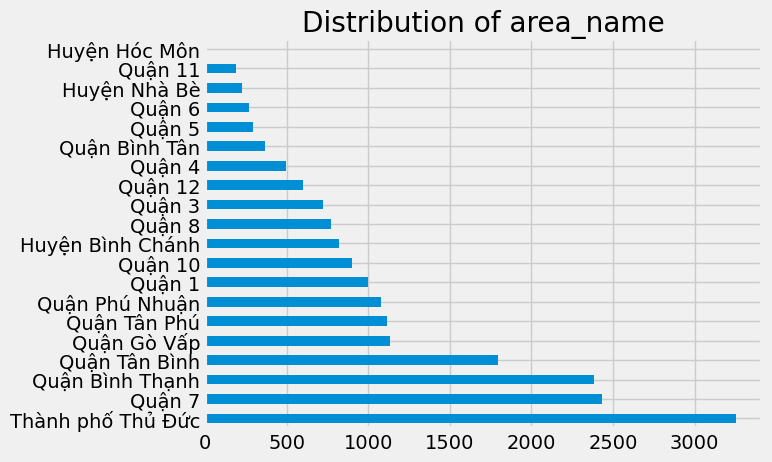

In [132]:
area = apartment_df['area_name'].value_counts()
area.plot.barh(title='Distribution of area_name')

Trên đây là phân bố căn hộ cho thuê theo quận sắp xếp theo số lượng tăng dần:
+ Nhiều nhất là thành phố Thủ Đức(quận Thủ Đức + quận 9 + quận 2 cũ) có diện tích lớn với gần 3500 tin cho thuê, tiếp theo là quận 7 (2500 tin).
+ Các quận huyện còn lại phân bố không chênh lệch nhau quá nhiều.
+ Huyện Hóc Môn đứng cuối bảng và không có tin đăng nào gần đây.

#### Cột **owner**

<Axes: title={'center': 'Distribution of owner'}, ylabel='owner'>

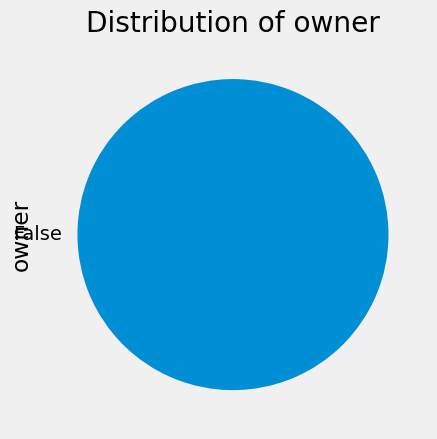

In [133]:
owner = apartment_df['owner'].value_counts()
owner.plot.pie(title='Distribution of owner')

Tất cả đề là False, có nghĩa là không có chủ nhà nào đăng tin cho thuê, tất cả đều là môi giới, nếu thuê thì sẽ khó thương lượng giảm giá với chủ nhà đuợc vì họ thường phải trả cho môi giới một khoản phí. Ta cũng loại bỏ cột này luôn.

In [134]:
apartment_df = apartment_df.drop(['owner'], axis=1)

#### Cột **apartment_type**

Gồm các loại căn hộ như sau:

In [135]:
apartment_df['apartment_type'].unique()

array(['Căn hộ dịch vụ, mini', 'Chung cư', 'Duplex', 'Officetel',
       'Penthouse', 'Tập thể, cư xá'], dtype=object)

(18650, 16)


<Axes: title={'center': 'Number of apartments per type'}>

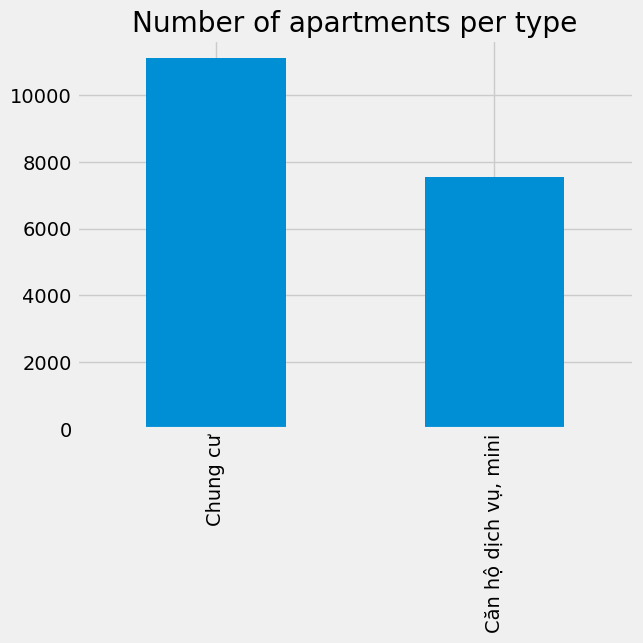

In [136]:
apartment_df = apartment_df[(apartment_df['apartment_type'] == 'Chung cư') | (apartment_df['apartment_type'] == 'Căn hộ dịch vụ, mini')]

print(apartment_df.shape)

type = apartment_df['apartment_type'].value_counts()

type.plot.bar(title="Number of apartments per type")

Sau khi lọc, chỉ còn 18650 dòng, bao gồm **Chung cư** với gần 12000 dòng, số còn lại là **Căn hộ dịch vụ, mini**(gần 7000 dòng).

#### Cột **zero_deposit**

<Axes: title={'center': 'Distribution of zero_deposit'}, ylabel='zero_deposit'>

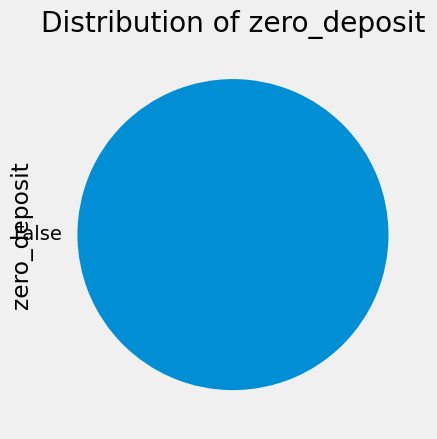

In [137]:
zero_deposit = apartment_df['zero_deposit'].value_counts()
zero_deposit.plot.pie(title='Distribution of zero_deposit')

Tất cả chủ nhà đều yêu cầu tiền cọc, vì vậy ta cũng sẽ bỏ qua cột này!

In [138]:
apartment_df = apartment_df.drop(['zero_deposit'], axis=1)

#### Cột **list_time**

<Axes: title={'center': 'Number of apartments per day'}>

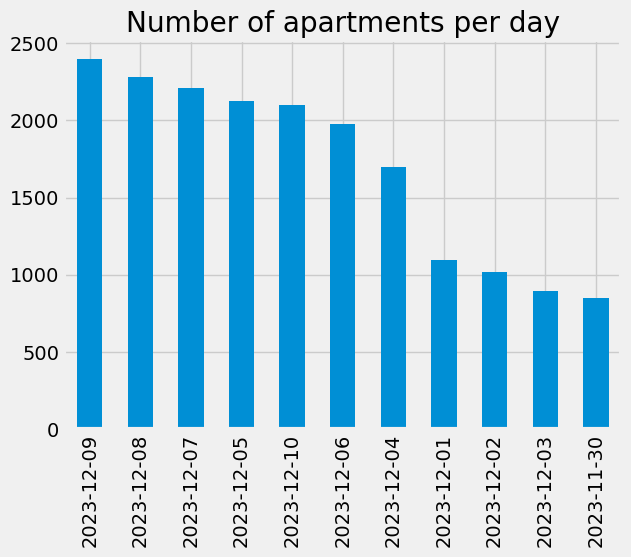

In [139]:
list_time = pd.to_datetime(apartment_df['list_time']).dt.date.value_counts()
list_time.plot.bar(title='Number of apartments per day')

Các tin được đăng từ 30/11/2023 tới 9/12/2023, trong khoảng 2 tuần, nên có thể coi dữ liệu là mới, tính ở thời điểm phân tích là ngày 9/1/2024. Ta cũng có thể bỏ cột này luôn vì nó không có quá nhiều ý nghĩa khi gần nhau.

In [140]:
apartment_df = apartment_df.drop(['list_time'], axis=1)

## 3. Đặt ra các câu hỏi?

### Câu 1. Giá thuê căn hộ ở các quận chênh lệch như thế nào?

**Ý nghĩa**: Có cái nhìn tổng quát về giá thuê nhà tại các quận, giá theo diện tích, theo số phòng, theo loại hình để có thể xem xét và đưa ra quyết định nên thuê ở đâu, các đặc điểm của căn hộ ra sao.

### Câu 2. Các yếu tố ảnh hưởng tới giá thuê nhà?

**Ý nghĩa**: Để hiểu thêm về sự tương quan giữa giá thuê với các yếu tố khác như diện tích, số phòng, số nhà vệ sinh, vị trí, ...

## 4. Phân tích dữ liệu và trả lời từng câu hỏi

### Câu 1: Giá thuê căn hộ ở các quận chênh lệch như thế nào?

Ta sẽ tổng hợp lại dữ liệu theo các quận, rồi tìm ra min-max và avg price theo số phòng, min-max theo size

In [141]:
pd.set_option('display.float_format',  '{:,.0f}'.format)

res = apartment_df.groupby(['area_name']).agg({ 'price': ['min', 'max', 'mean', 'count'], 'size': ['min', 'max'] })
print('Mean, min, and max price grouped by area_name')
res

Mean, min, and max price grouped by area_name


price                             size       
                       min        max       mean count  min    max
area_name                                                         
Huyện Bình Chánh   1500000   19000000  6,995,564   816   20    306
Huyện Hóc Môn      4300000    5500000  4,860,000     5   25     70
Huyện Nhà Bè       3400000   25000000 11,814,091   220   13    330
Quận 1              900000  100000000 11,039,371   967   15 72,000
Quận 10            2900000   35000000 10,771,932   866   15    135
Quận 11            1675000   19000000  7,018,737   179   18    116
Quận 12            2000000   27500000  6,126,752   545   16    162
Quận 3             3000000   33000000  8,734,698   702   15    200
Quận 4              900000   45000000 14,487,156   468   20    220
Quận 5             3800000   30000000  9,492,254   284   20    132
Quận 6             2500000   20000000  8,205,859   266   16    130
Quận 7              650000   82000000 10,316,286  2233   15    257
Quận 8             2900000   27000000  8,070,755   740   10    535
Quận Bình Thạnh     900000   53500000  9,173,068  2212   15    188
Quận Bình Tân      2100000   14000000  6,194,468   329   18    160
Quận Gò Vấp        2000000   18000000  5,584,470  1002   15    113
Quận Phú Nhuận     2700000   32000000  9,050,722  1039   16    138
Quận Tân Bình      2000000   35000000  7,781,967  1677   14  1,000
Quận Tân Phú       1200000   30000000  8,453,888   980   12    320
Thành phố Thủ Đức   500000   85000000 11,908,950  3120   15  1,009

<Axes: title={'center': 'Mean, min, and max price grouped by area_name'}, ylabel='area_name'>

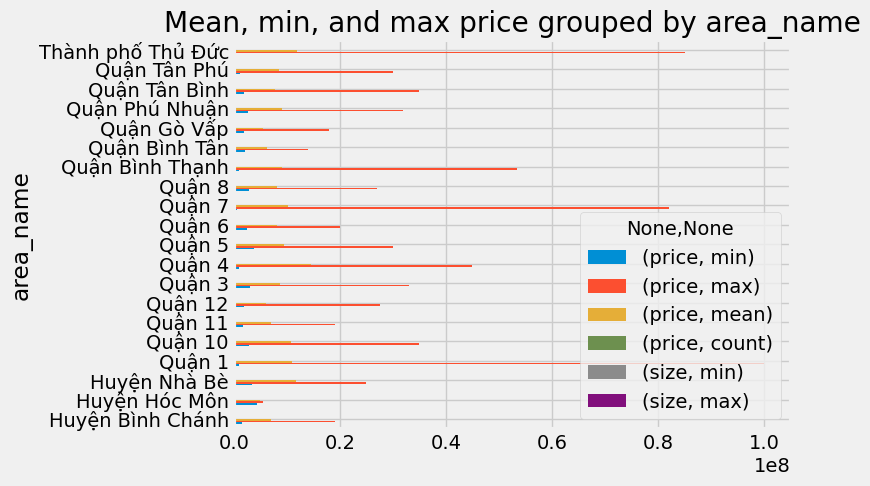

In [142]:
res.plot.barh(title='Mean, min, and max price grouped by area_name')

 - Từ dữ liệu trên, ta thấy Quận 4 có giá nhà trung bình cao nhất, với mức giá 14,487,156 VND, còn huyện Hóc Môn có giá nhà trung bình thấp nhất với 4,860,000 VND. Sự chênh lệch này có thể dễ dàng lý giải vì Quận 4 nằm ở trung tâm thành phố nên sẽ có giá cho thuê cao hơn.
 - Một số quận như Quận 4, Quận 7 và Thành phố Thủ Đức có phân phối giá thuê rộng,có thể là do sự đa dạng trong loại hình và chất lượng căn hộ.
 - Nhìn chung, các quận ở gần trung tâm sẽ có giá cao hơn so với các quận ngoại thành.

### Câu 2: Các yếu tố ảnh hưởng tới giá thuê nhà?

Tìm trung bình số nhà vệ sinh, số phòng của từng quận, huyện.

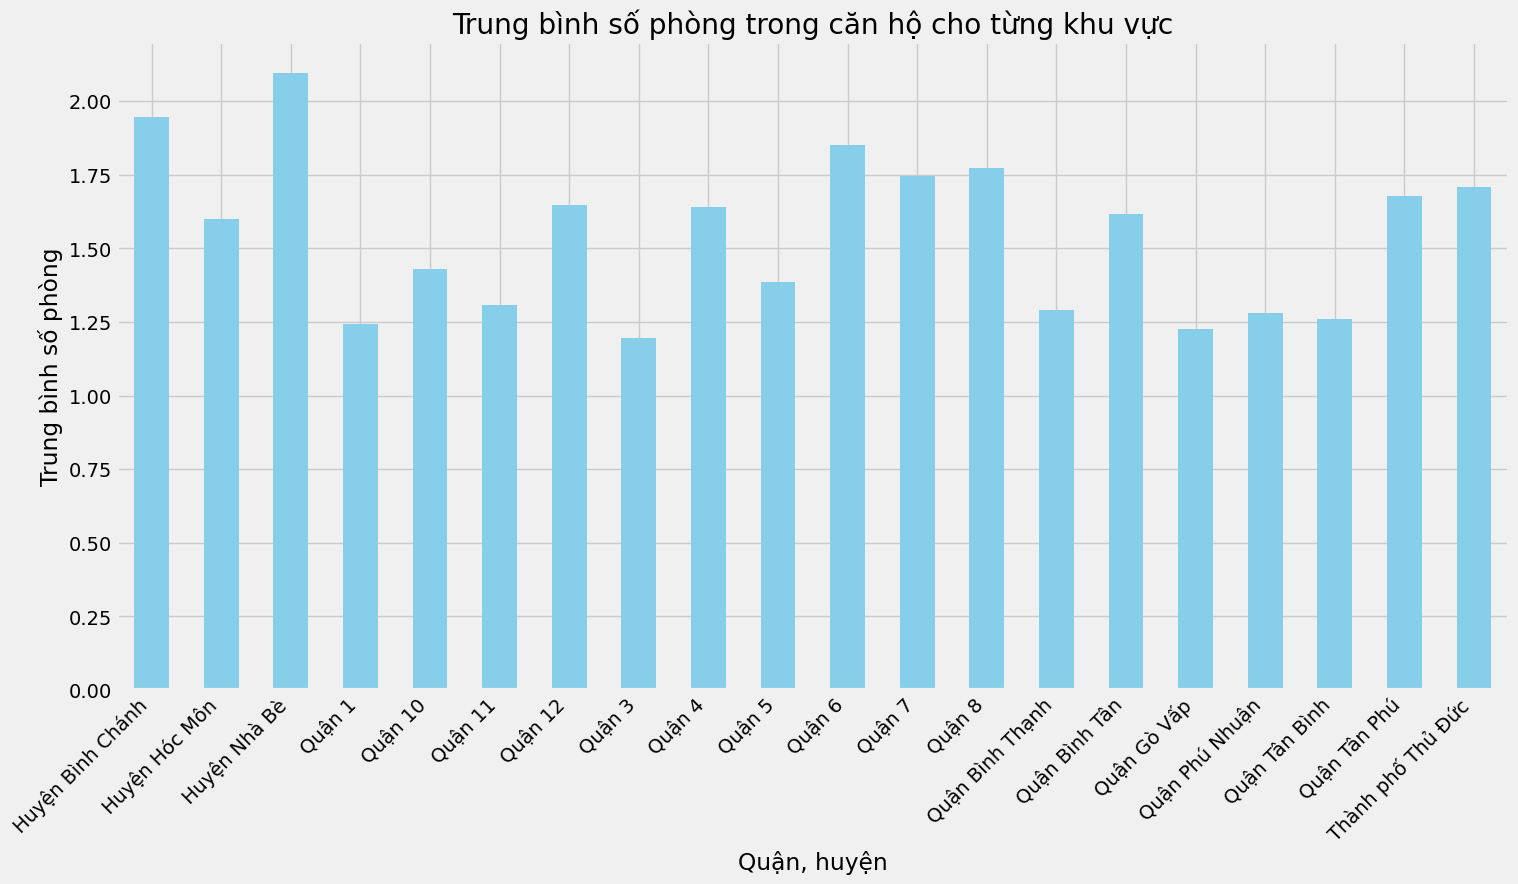

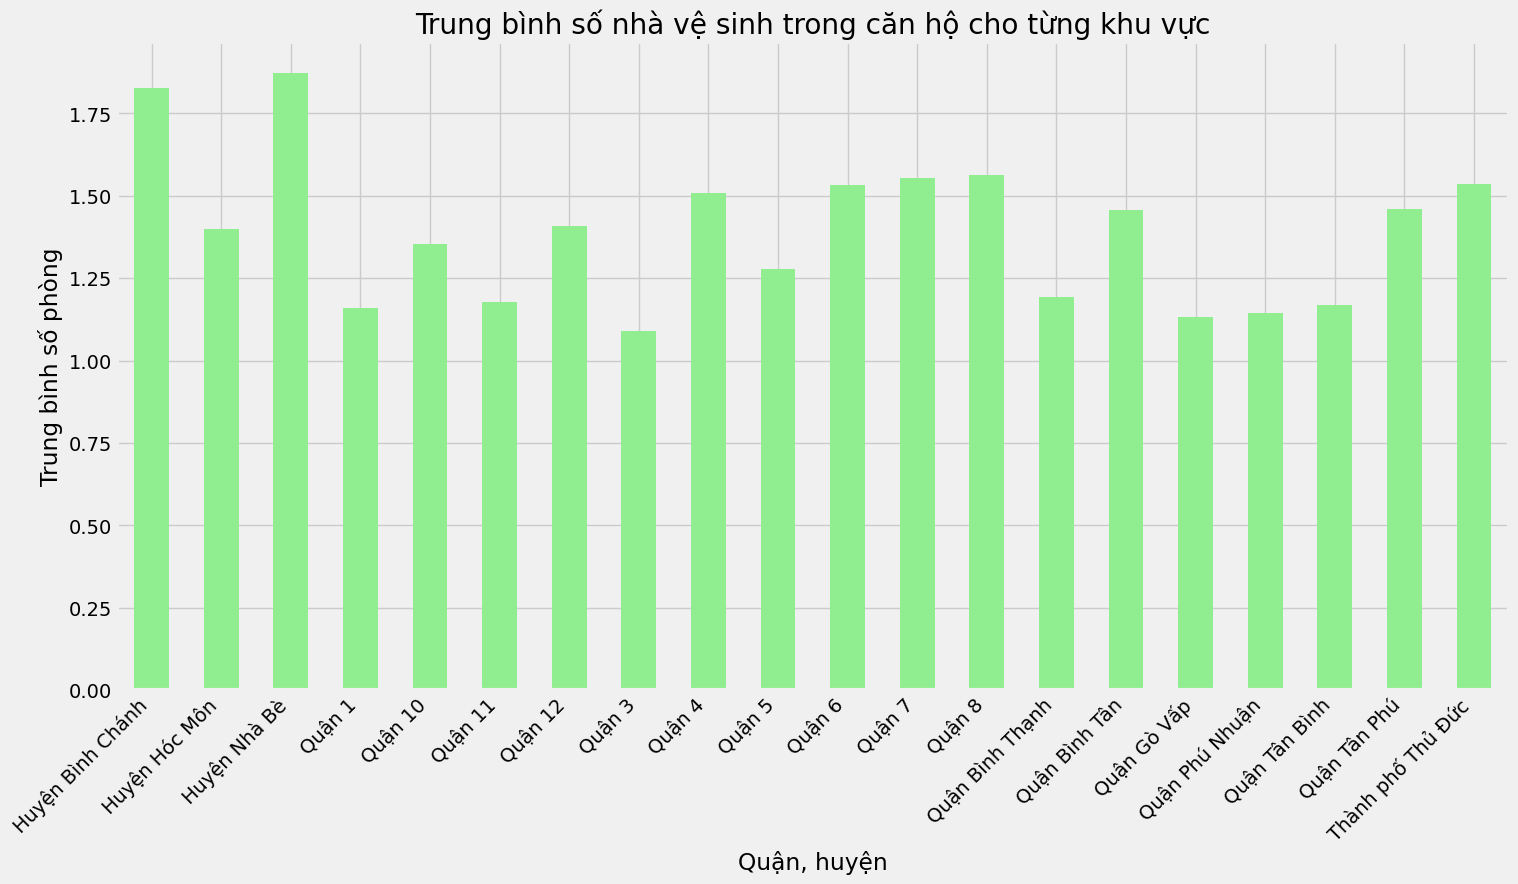

In [143]:
# Calculate average rooms and toilets for each area
avg_rooms_by_area = apartment_df.groupby('area_name')['rooms'].mean()
avg_toilets_by_area = apartment_df.groupby('area_name')['toilets'].mean()

plt.figure(figsize=(16, 8))
avg_rooms_by_area.plot(kind='bar', color='skyblue')
plt.title('Trung bình số phòng trong căn hộ cho từng khu vực')
plt.xlabel('Quận, huyện')
plt.ylabel('Trung bình số phòng')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(16, 8))
avg_toilets_by_area.plot(kind='bar', color='lightgreen')
plt.title('Trung bình số nhà vệ sinh trong căn hộ cho từng khu vực')
plt.xlabel('Quận, huyện')
plt.ylabel('Trung bình số phòng')
plt.xticks(rotation=45, ha='right')
plt.show()

**Ta nhận thấy:** số phòng và số nhà vệ sinh trung bình giữa các quận, huyện có sự tương đồng với nhau, chứng tỏ giá nhà không ảnh hưởng bởi những yếu tố này.

Ta tiến hành tính thử khoảng cách của từng tin đăng với Ủy ban Nhân dân Thành phố Hồ Chí Minh(trung tâm Quận 1):

In [144]:
from geopy.distance import geodesic

df = apartment_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Coordinates of the central point
lat_cen, long_cen = 10.776671078389885, 106.70139401141026

# Function to calculate haversine distance
def calculate_distance(row):
    coords = (row['latitude'], row['longitude'])
    return geodesic(coords, (lat_cen, long_cen)).km

# Apply the function to create a new column 'distance' in the DataFrame
df['distance'] = df.apply(calculate_distance, axis=1)

# Filter out the rows with distance > 50 km
df = df[df['distance'] <= 50]

# Sort the DataFrame based on distance
df_sorted = df.sort_values(by='distance')

# Display the sorted DataFrame
result_df = df_sorted[['area_name', 'distance', 'price', 'size']].copy()
result_df.loc[:, 'price_per_m2'] = result_df['price'] / result_df['size']


Sau đó vẽ scatter plot:

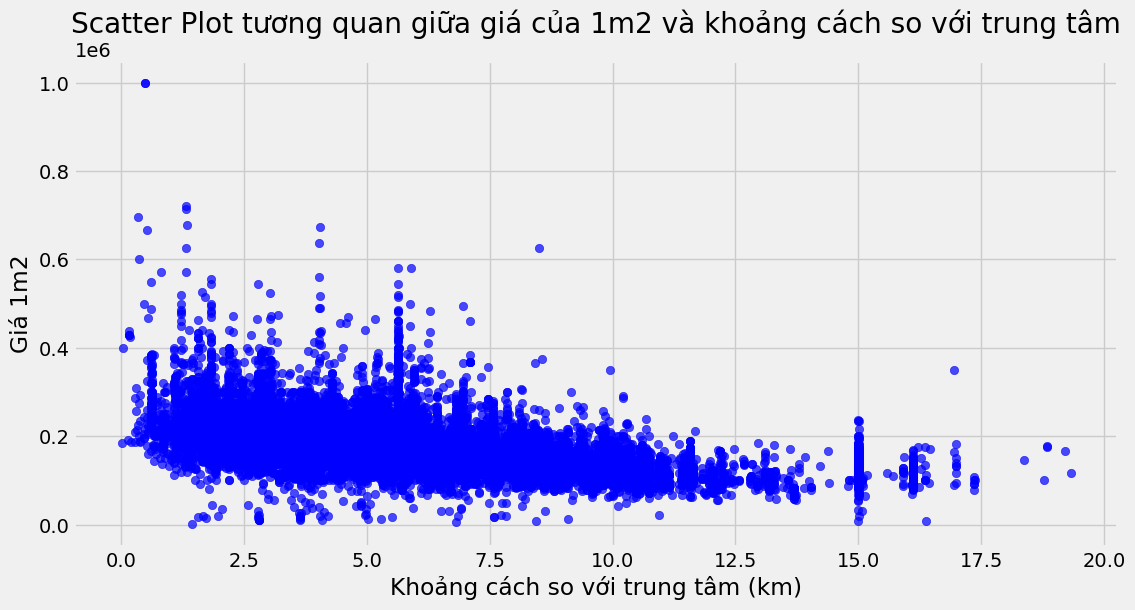

In [145]:
plt.figure(figsize=(12, 6))
plt.scatter(result_df['distance'], result_df['price_per_m2'], c='blue', alpha=0.7)
plt.title('Scatter Plot tương quan giữa giá của 1m2 và khoảng cách so với trung tâm')
plt.xlabel('Khoảng cách so với trung tâm (km)')
plt.ylabel('Giá 1m2')
plt.show()

Từ biểu đồ trên ta thấy trong khu vực bán kính 6km tính từ trung tâm, giá của 1m2 có biến động lớn, so với những khu vực ngoài bán kính đó thì giá của 1m2 có xu hướng ổn định hơn, từ đó chứng tỏ giá cho thuê có xu hướng cao hơn ở khu vực gần trung tâm.

## 5. Tổng hợp lại quá trình thực hiện đồ án

### Việt - 20120401
**Khó khăn gặp phải:**
  - Dữ liệu bị sai do người dùng vô tình nhập sai hoặc cố tình nhập sai, điều này gây ảnh hưởng tới việc phân tích dữ liệu.
  - Một khó khăn nữa là việc crawl data bị giới hạn, điều này có thể tạo ra một tập dữ liệu không đủ đa dạng để phản ánh đầy đủ thị trường bất động sản.
  - Gặp khó khăn khi tìm hiểu về các biểu đồ và phương pháp trực quan hóa dữ liệu phù hợp. Chọn biểu đồ phù hợp để thể hiện mối liên quan giữa các biến là một thách thức lớn đối với em.
  
**Đã học được điều gì:**
  - Làm việc với thư viện `geopy` để tính toán khoảng cách mở rộng kiến thức của em về các hoạt động địa lý trong Python.
  - Em học thêm về trực quan hóa dữ liệu và khám phá, đặc biệt trong ngữ cảnh của dữ liệu bất động sản.

### Hùng - 1712222
**Khó khăn gặp phải:**
  - Một khó khăn là xử lý dữ liệu thiếu trong tập dữ liệu. Một số cột có giá trị thiếu, và quyết định liệu có nên điền giá trị còn thiếu hay loại bỏ chúng đòi hỏi sự cân nhắc cẩn thận.
  - Việc phân tích dữ liệu văn bản (cột `subject` và `body`) có thể đối mặt với thách thức khi cần trích xuất thông tin có ý nghĩa từ các thông điệp và mô tả căn hộ. Các biểu diễn ngôn ngữ tự nhiên đôi khi khá phức tạp và đòi hỏi kỹ thuật xử lý ngôn ngữ tự nhiên nên nhóm em quyết định bỏ qua phần này.

**Đã học được điều gì:**
  - Em đã có được kinh nghiệm trong việc tiền xử lý dữ liệu, bao gồm xử lý giá trị thiếu, làm sạch dữ liệu.
  - Có thêm kiến thức trong việc phân tích dữ liệu và trực quan hóa.

### Cả nhóm:
**Nếu có thêm thời gian:**
  - Nếu có thêm thời gian, chúng em sẽ khám phá các phân tích nâng cao hơn, chẳng hạn như phân cụm các địa điểm căn hộ tương tự hoặc triển khai các mô hình máy học để dự đoán giá thuê dựa trên các đặc trưng khác nhau.
  - Chúng em cũng có thể nghiên cứu sâu hơn về kỹ thuật trích xuất đặc trưng, trích xuất thông tin ý nghĩa hơn từ dữ liệu văn bản (cột `subject` và `body`) hoặc khám phá các tập dữ liệu bên ngoài có thể cải thiện phân tích của chúng em.
  - Tiến hành đánh giá chi tiết hơn về các điểm ngoại lệ và điểm dữ liệu có ảnh hưởng sẽ cung cấp thông tin sâu rộng hơn về động lực thị trường.

## 6. Reference


- [Cách lấy API hoặc crawl data của Nhatot.com](https://voz.vn/t/cach-lay-api-hoac-crawl-data-cua-nhatot-com.773763/)
- [Crawl dữ liệu từ trang chotot.vn](https://vozforum.org/threads/crawl-du-lieu-tu-trang-chotot-vn.223333/page-2)